<a href="https://colab.research.google.com/github/neiladvani21/Sparks-Foundation-Task-1/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Assignment 3 

## Imports

In [ ]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd 
import pandas_profiling as pp 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.cluster import KMeans 
from sklearn.cluster import AgglomerativeClustering

# Data Cleaning

From running pandas profiling there are no missing values in the dataset. There are duplicates, however that is ok for clustering purposes. If we remove duplicates we would have to add weights instead. Additionally it is entirely possible to have observations that have the same weight time and eruption time. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/faithful (1).csv')

In [ ]:
len(df)

272

### Pandas Profiling

In [ ]:
df_profile = df.profile_report()
df_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df_profile.to_file('faithful.csv.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Problem 1 

## 1a. Create and print out a scatter plot of this dataset, eruption time versus waiting time. (10 points)

Text(0.5, 1.0, 'Old Faithful Geyser Eruption')

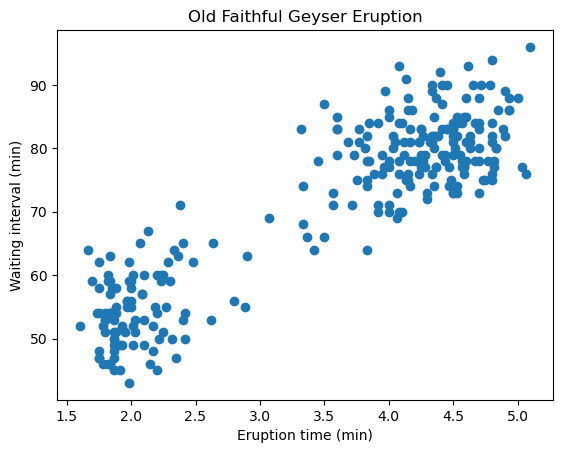

In [ ]:
plt.scatter(df.eruptions, df.waiting)
plt.xlabel('Eruption time (min)')
plt.ylabel('Waiting interval (min)')
plt.title('Old Faithful Geyser Eruption')

# Problem 1b

### Answer: 2 Clusters 

# Problem 1c
Describe the steps of a hierarchical clustering algorithm. Based on your scatter plot, would this method be appropriate for this dataset? (10 points) 

**Steps** 
1. First create a dendrogram- this plot will show the hierarchy of clusters from the bottom (individual points) to the top (a single cluster consisting all data points) 
2. Use AgglomerativeClustering class with the number of clusters given from the dendrogram, using the same eclidean distance and Ward linkage 
3. use the .fit_predict method to visualize the clusters 

**Based on your scatter plot, would this method be appropriate for this dataset?**
The hierarchical clustering method is not appropriate for this dataset because it is already easy to see the clusters from plotting a scatterplot.

## Hierarchical Clustering 

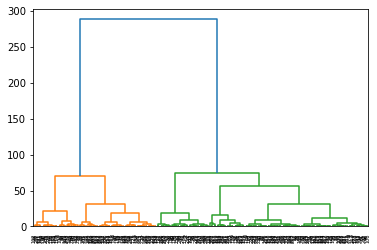

In [ ]:
linkage_data = linkage(df, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

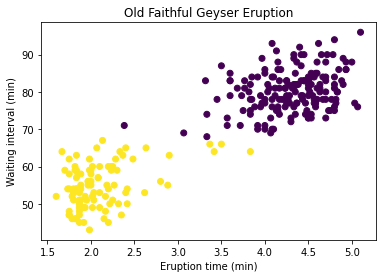

In [ ]:
#perform actual clustering 
hierarchical_cluster = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
labels = hierarchical_cluster.fit_predict(df)
plt.scatter(df.eruptions, df.waiting, c = labels)
plt.xlabel('Eruption time (min)')
plt.ylabel('Waiting interval (min)')
plt.title('Old Faithful Geyser Eruption')
plt.show()

# Problem 2

Implement the k-means algorithm in Python, and use it to perform clustering on the Old Faithful dataset. Use the number of clusters that you identified in Problem 1. Be sure to ignore the first column, which contains instance ID numbers. In your notebook, including the following items:


## Part a 
Your source code for the k-means algorithm. You need to implement the algorithm from scratch. (45 points)

### Convert to numpy array

In [ ]:
X = df.values

### Calculate WCSS
WCSS (Within-Cluster Sum of Square) is the sum of squared distance between each point and the centroid in a cluster

In [ ]:
def calculate_cost(X, centroids, cluster):
    sum = 0
    for i, val in enumerate(X):
        sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 +(centroids[int(cluster[i]), 1]-val[1])**2)
    return sum

### Implement K-means

In [ ]:
def kmeans(X, k):
    diff = 1
    cluster = np.zeros(X.shape[0])
    centroids = df.sample(n=k).values
    while diff:
        # for each observation
        for i, row in enumerate(X):
            mn_dist = float('inf')
            # dist of the point from all centroids
            for idx, centroid in enumerate(centroids):
                d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)
                # store closest centroid
                if mn_dist > d:
                    mn_dist = d
                    cluster[i] = idx
        new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values
     # if centroids are same then leave
        if np.count_nonzero(centroids-new_centroids) == 0:
            diff = 0
        else:
            centroids = new_centroids
    return centroids, cluster

## Part B
A scatter plot of your final clustering, with the data points in each cluster color-coded, or plotted with different symbols. Include the cluster centers in your plot. (10 points)

### Visualize Clusters 

In [ ]:
k = 2
centroids, cluster = kmeans(X, k)

C:\Users\Emily\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Emily\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


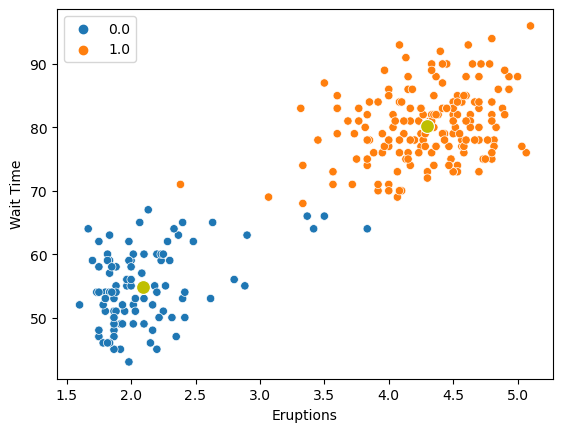

In [ ]:
sns.scatterplot(X[:,0], X[:, 1], hue=cluster)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')
plt.xlabel('Eruptions')
plt.ylabel('Wait Time')
plt.show()

## Part C
 A plot of the k-means objective function versus iterations of the algorithm. Recall that the objective function is  (10 points)

### Find K Value using elbow method

In [ ]:
cost_list = []
for k in range(1, 10):
    centroids, cluster = kmeans(X, k)
    # WCSS (Within cluster sum of square)
    cost = calculate_cost(X, centroids, cluster)
    cost_list.append(cost)

### Elbow Plot 

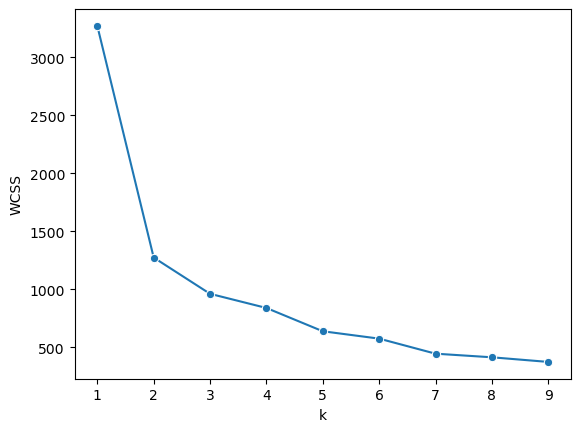

In [ ]:
sns.lineplot(x=range(1,10), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

## Part D
Did the method manage to find the clusters that you identified in Problem 1? If not, did it help to run the method again with another random initialization? (10 points)

**The clusters mentioned in problem 1 were discovered. However, if you tried to find the k-value using the elbow plot, you might start with k = 3 because there is less of a decrease after k = 3 rather than k = 2, so you would need to run the algorithm again with a random initialization to find the clusters from problem 1.**